#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## **Ejercicio 1**

In [2]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import os
import math
import warnings
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from scipy.stats import loguniform

from xgboost import XGBClassifier

In [3]:
# Cargamos los datos:

df = pd.read_csv("../datasets/SouthGermanCredit.asc", delim_whitespace=True)
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [4]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

usecols = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

df = pd.DataFrame(df.to_numpy(), columns=usecols)

# *********** Aquí termina la sección de agregar código *************




## **Ejercicio 2**

In [5]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

df['credit_risk'] = 1 - df['credit_risk']


# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [6]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

X = df.drop('credit_risk', axis=1)
Y = df['credit_risk']

Xtrain, Xt, ytrain, Yt = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=42)
Xval, Xtest, yval, ytest = train_test_split(Xt, Yt, train_size=0.5, shuffle=True, random_state=42)

# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **Variables Categóricas:**

1.   status
2.   credit_history
3.   purpose
4.   savings
5.   employment_duration
6.   installment_rate
7.   personal_status_sex
8.   other_debtors
9.   present_residence
10.  property
11.  other_installment_plans
12.  housing
13.  number_credits
14.  job
15.  people_liable
16.  telephone
17.  foreign_worker
18.  credit_risk

### **Variables Numéricas:**

1.   duration
2.   amount
3.   age



### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

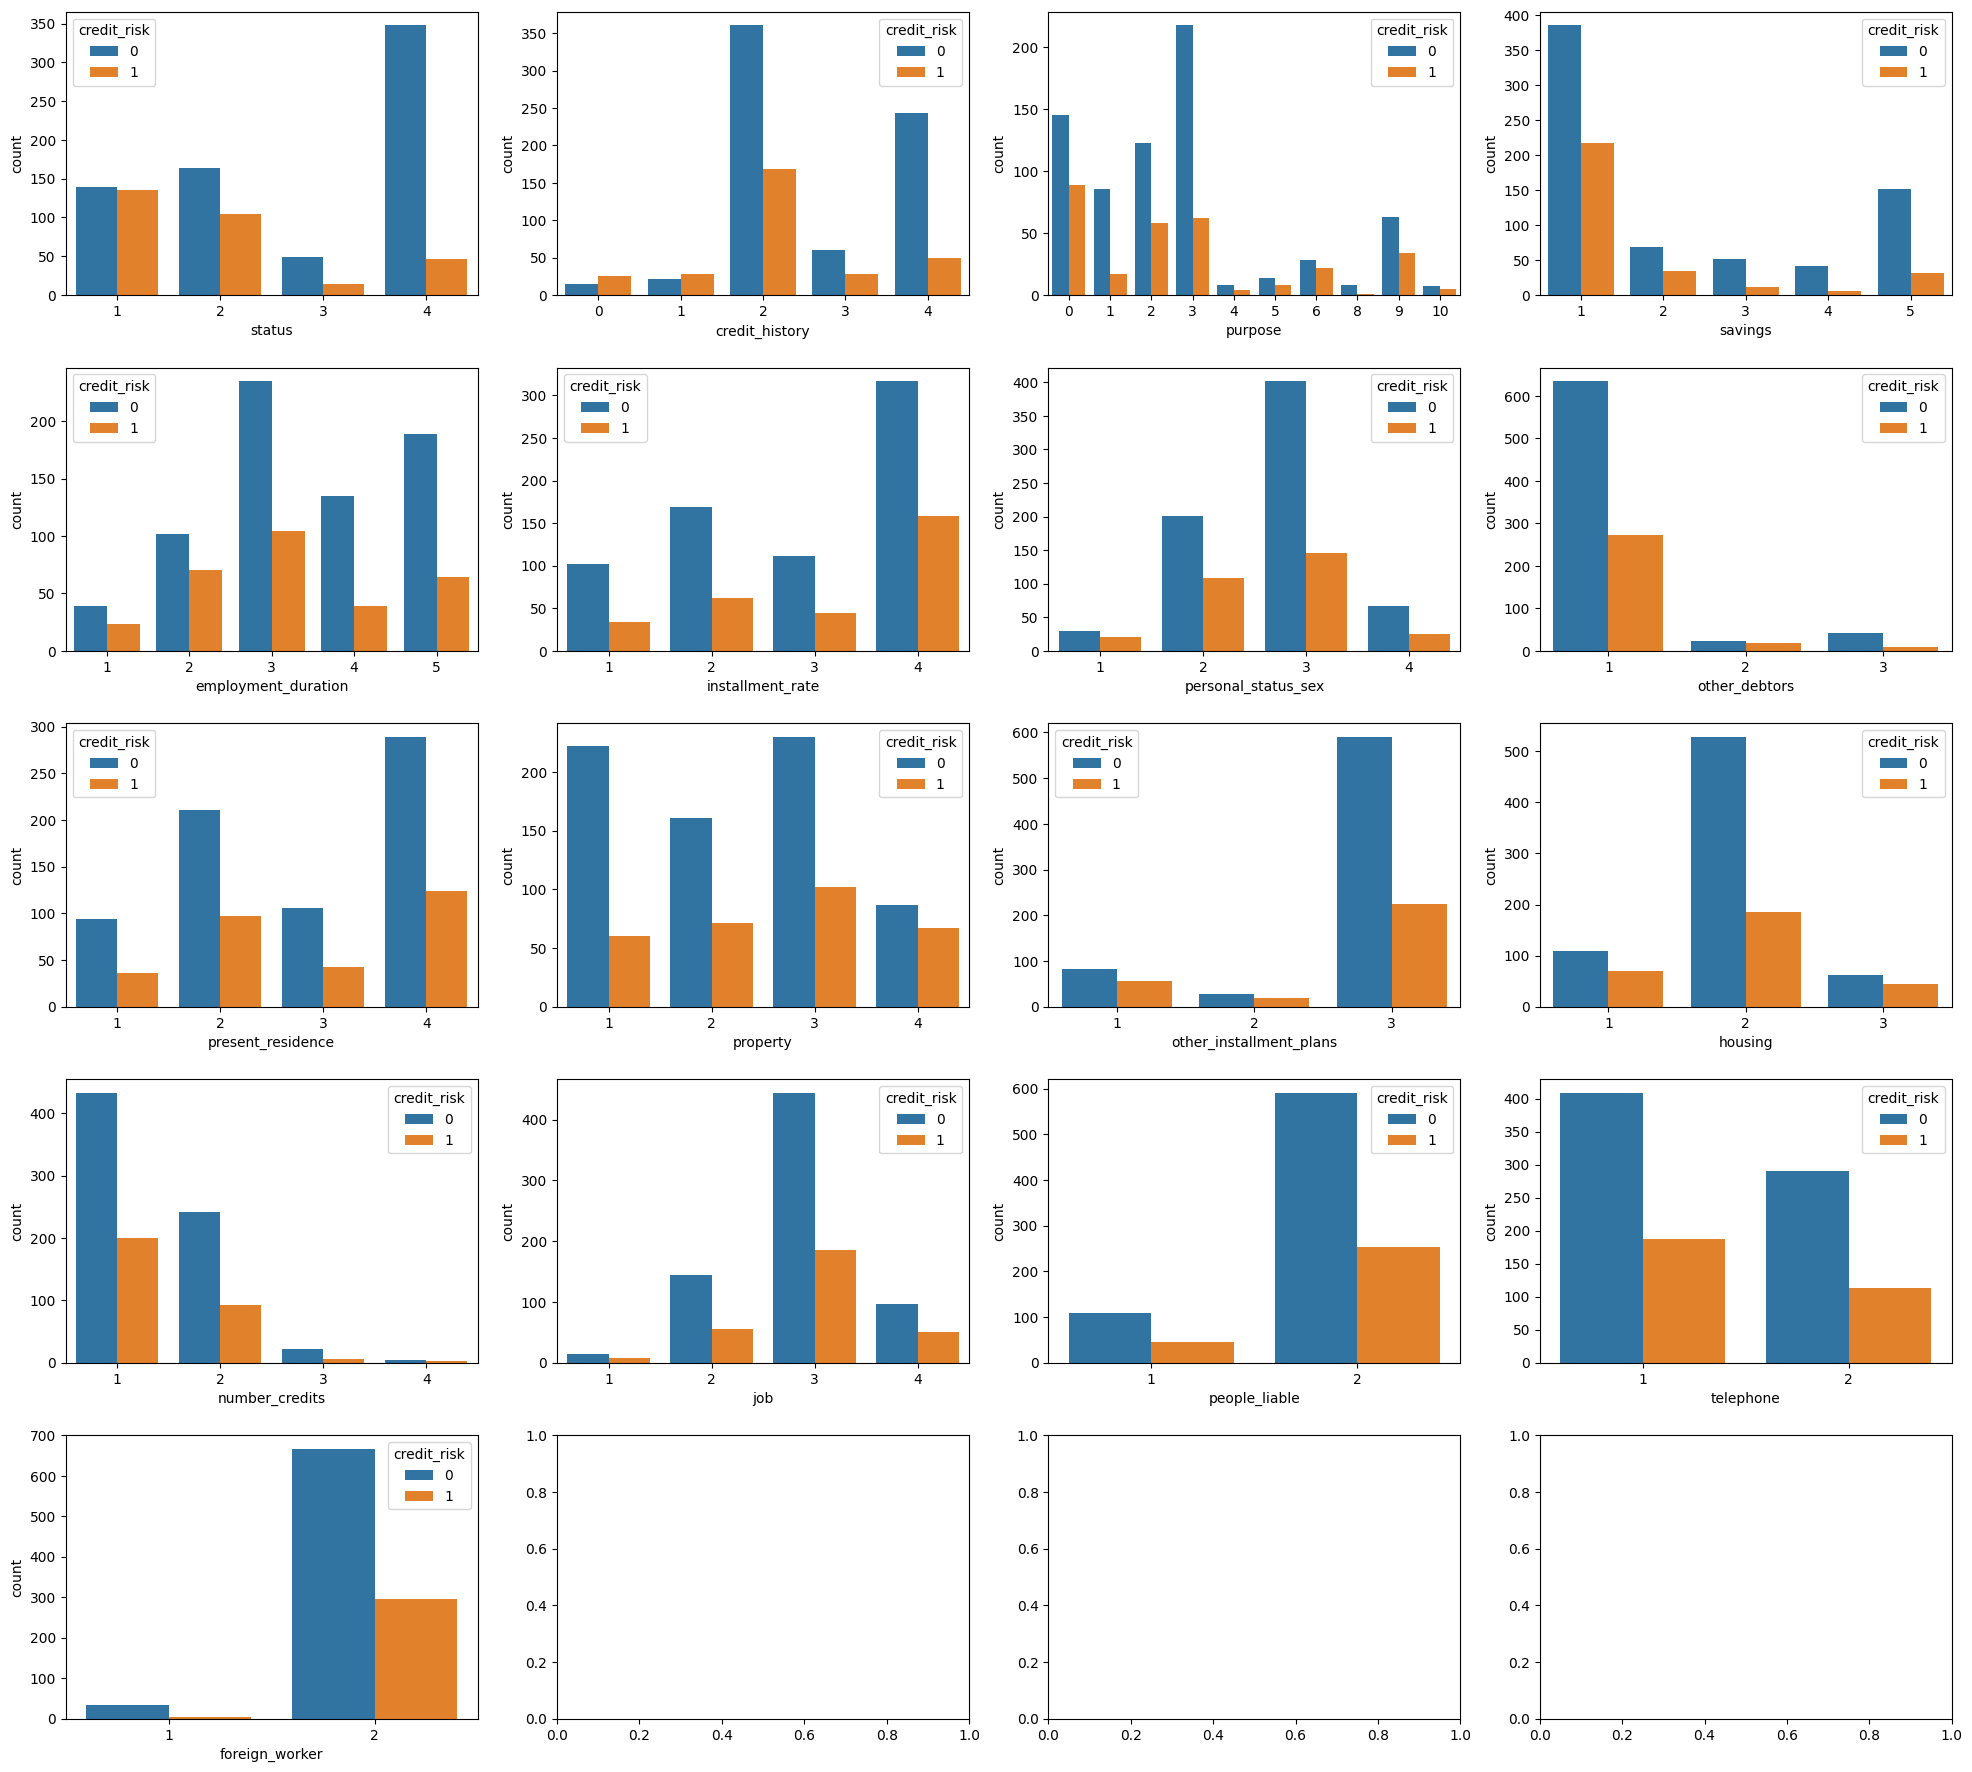

In [7]:
fig, axes = plt.subplots(5, 4, figsize=(20, 18))

axes = axes.ravel()

cat_cols = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

for i, col in enumerate(cat_cols):
    sns.countplot(df, x=col, hue='credit_risk', ax=axes[i])

fig.tight_layout(pad=1.7)

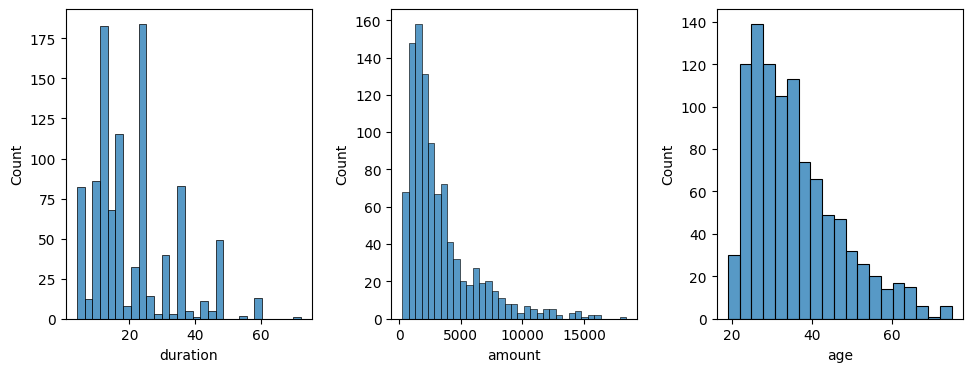

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes = axes.ravel()

num_cols = ['duration', 'amount', 'age']

for i, col in enumerate(num_cols):
    sns.histplot(df, x=col, ax=axes[i])

fig.tight_layout(pad=1.7)


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   SimpleImputer con estrategia mediana para numericas y categoricas
*   MinMaxScaler en el rango 0,1 para numericas
*   OneHotEncoder para categoricas


### ++++++++ Termina la sección de agregar texto. +++++++++++


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [9]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe = Pipeline(steps=[('imputar', SimpleImputer(strategy='median')), ('sqrt', FunctionTransformer(np.sqrt)), ('scalar', MinMaxScaler(feature_range=(0, 1)))])
num_pipe_nombres = num_cols


# Variables categóricas:
cat_pipe = Pipeline(steps=[('imputar', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
cat_pipe_nombres = cat_cols


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers=[('numeric', num_pipe, num_pipe_nombres), ('categorical', cat_pipe, cat_pipe_nombres)], remainder='passthrough')

# *********** Aquí termina la sección de agregar código *************




## **Ejercicio 7**

In [10]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [11]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja. En dado caso una decisión
  # puede ser que un modelo tenga simplemente los valores de sus
  # hiperparámetros con los predeterminados.
  # Consulta en dado caso la documentación de cada modelo para
  # la identificación de los hiperparámetros que desees ajustar.


  # Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # k-Vecinos más Cercanos:
  modelos.append(KNeighborsClassifier())
  nombres.append('kNN')

  # Árbol de decisiones:
  modelos.append(DecisionTreeClassifier( max_depth=5 ))
  nombres.append('DTree')

  # Bosque Aleatorio:
  modelos.append(RandomForestClassifier( max_depth=5 ))
  nombres.append('RF')

  # XGBoosting:
  modelos.append(XGBClassifier( n_jobs=multiprocessing.cpu_count(), max_depth=5 ))
  nombres.append('XGBoost')

  # Red neuronal de Perceptrón Multicapa:
  modelos.append(MLPClassifier( hidden_layer_sizes=(50), activation='logistic', solver='sgd', learning_rate='adaptive' ))
  nombres.append('MLP')

  # Máquina de Vectores de Soporte:
  modelos.append(SVC( kernel='rbf', C=1, gamma=0.1))
  nombres.append('SVM')

  # *********** Aquí termina la sección de agregar código *************

  return modelos, nombres






# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = ['accuracy','precision','recall','f1','roc_auc']

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.743 (0.026)
	 train_accuracy 0.792 (0.005)
	 test_precision 0.596 (0.057)
	 train_precision 0.699 (0.013)
	 test_recall 0.460 (0.053)
	 train_recall 0.543 (0.020)
	 test_f1 0.518 (0.051)
	 train_f1 0.611 (0.013)
	 test_roc_auc 0.774 (0.030)
	 train_roc_auc 0.842 (0.006)
>> kNN
	 test_accuracy 0.711 (0.022)
	 train_accuracy 0.799 (0.010)
	 test_precision 0.542 (0.067)
	 train_precision 0.761 (0.021)
	 test_recall 0.319 (0.049)
	 train_recall 0.482 (0.026)
	 test_f1 0.398 (0.042)
	 train_f1 0.590 (0.025)
	 test_roc_auc 0.677 (0.031)
	 train_roc_auc 0.858 (0.011)
>> DTree
	 test_accuracy 0.713 (0.032)
	 train_accuracy 0.802 (0.013)
	 test_precision 0.553 (0.099)
	 train_precision 0.804 (0.069)
	 test_recall 0.323 (0.079)
	 train_recall 0.472 (0.091)
	 test_f1 0.401 (0.072)
	 train_f1 0.584 (0.061)
	 test_roc_auc 0.686 (0.049)
	 train_roc_auc 0.850 (0.014)
>> RF
	 test_accuracy 0.735 (0.015)
	 train_accuracy 0.796 (0.009)
	 test_precision 0.798 (0.116)
	 train_preci

c:\Users\jmanuelc87\miniconda3\envs\machine-learning\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmanuelc87\miniconda3\envs\machine-learning\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmanuelc87\miniconda3\envs\machine-learning\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

>> MLP
	 test_accuracy 0.699 (0.002)
	 train_accuracy 0.699 (0.001)
	 test_precision 0.000 (0.000)
	 train_precision 0.000 (0.000)
	 test_recall 0.000 (0.000)
	 train_recall 0.000 (0.000)
	 test_f1 0.000 (0.000)
	 train_f1 0.000 (0.000)
	 test_roc_auc 0.581 (0.057)
	 train_roc_auc 0.569 (0.051)
>> SVM
	 test_accuracy 0.739 (0.018)
	 train_accuracy 0.888 (0.006)
	 test_precision 0.633 (0.065)
	 train_precision 0.966 (0.010)
	 test_recall 0.321 (0.064)
	 train_recall 0.652 (0.021)
	 test_f1 0.423 (0.064)
	 train_f1 0.778 (0.016)
	 test_roc_auc 0.766 (0.029)
	 train_roc_auc 0.971 (0.004)


## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

El error mas costoso es el Falso Negativo porque representa una persona a quien, en terminos de este problema, se le clasifico como buen cliente y se le otorgo el credito sin embargo no es capaz de ser solvente y resulta en un mal cliente terminando de no pagar el credito.

b.   ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

False alarm rate  (1 - precision), Recall, y Accuracy

c.   Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

Especificity 


### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

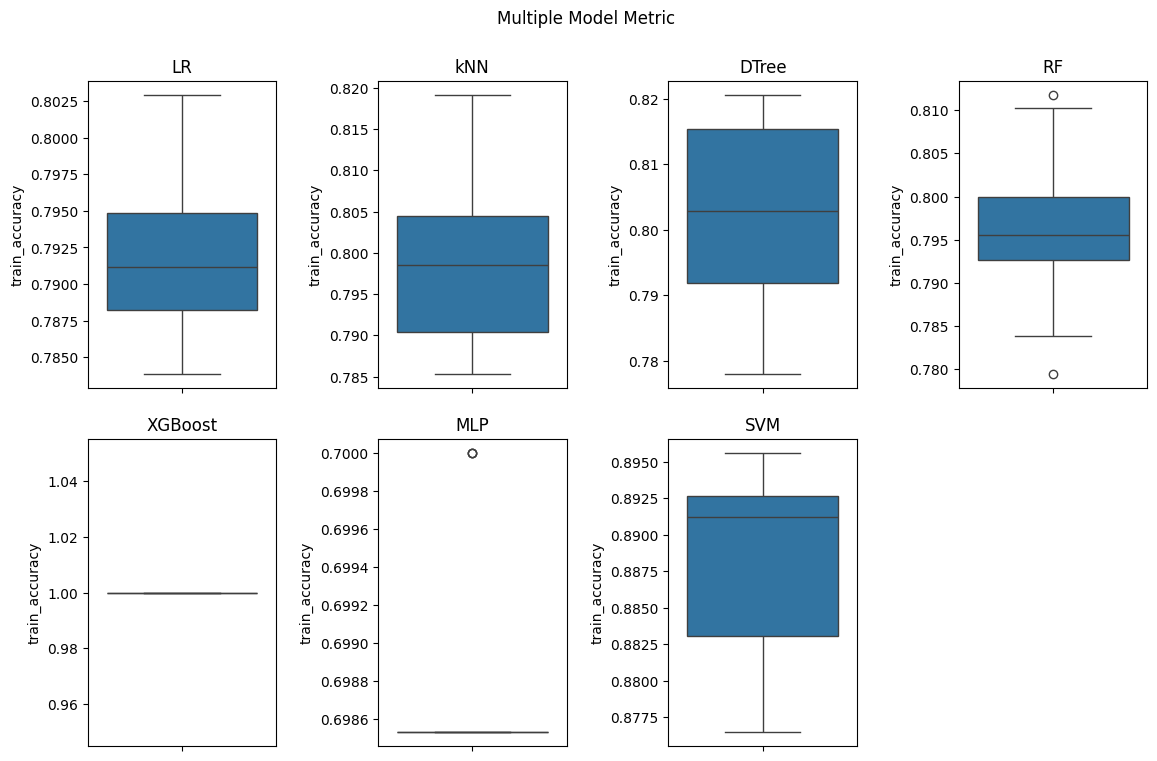

In [12]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

fig, axes = plt.subplots(2,4, figsize=(12,8))
fig.suptitle('Multiple Model Metric')
axes = axes.ravel()
for score, axis, name in zip(resultados, axes, nombres):
    axis.set_title(name)
    sns.boxplot(score, y='train_accuracy', ax=axis)
    
plt.tight_layout(pad=1.7)
plt.delaxes(axes[7])

# *********** Aquí termina la sección de agregar código *************


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [13]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

# ************* Inlcuye aquí tu código:**************************

pipeline1 = ImbPipeline(steps=[('ct', columnasTransformer), ('smote', SMOTE()), ('lr', LogisticRegression( )) ])
pipeline2 = ImbPipeline(steps=[('ct', columnasTransformer), ('smote', SMOTE()), ('xgb', XGBClassifier( )) ])
pipeline3 = ImbPipeline(steps=[('ct', columnasTransformer), ('smote', SMOTE()), ('svc', SVC( probability=True )) ])


pipeline1, pipeline2, pipeline3

# *********** Aquí termina la sección de agregar código *************

(Pipeline(steps=[('ct',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('numeric',
                                                   Pipeline(steps=[('imputar',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('sqrt',
                                                                    FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                   ('scalar',
                                                                    MinMaxScaler())]),
                                                   ['duration', 'amount',
                                                    'age']),
                                                  ('categorical',
                                                   Pipeline(steps=[('imputar',
                                       

# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Los modelos basados en arboles y son los que obtuvieron mejor desempeño, al ajustar el limite de su profundidad, no se sobre-entrenaron. Las SVM y regresion logistica tambien tuvieron buen desempeño en la metrica accuracy.

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 13**

In [14]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.


# ************* Inlcuye aquí tu código:**************************
params_lr = {
    'lr__solver': ['liblinear'],
    'lr__C': np.array(loguniform.rvs(1e-5, 7, size=6)) }

params_xgb = {
    'xgb__max_depth': [3,5,7,10,20]
}

params_svc = {
    'svc__kernel': ['rbf'],
    'svc__C': np.array(loguniform.rvs(1e-4, 3, size=4)),
    'svc__gamma': [0.1, 0.3, 0.01, 0.03, 0.001]
}

rsf = RepeatedStratifiedKFold(n_splits=5, random_state=42)

for pipeline, name, params in zip([pipeline1, pipeline2, pipeline3], ['logistic regression', 'xgboost', 'svm'], [params_lr, params_xgb, params_svc]):
    
    print("="*35, name, "="*35, end="\n\n")
    
    model = GridSearchCV(pipeline, params, scoring='accuracy', verbose=1, cv=rsf)
    
    model.fit(Xtrainval, ytrainval)
    
    ypred = model.predict(Xval)
    ypred1 = model.predict(Xtrain)
    
    report_train = classification_report(ytrain, ypred1)
    report_val = classification_report(yval, ypred)
    
    print("Train Report:")
    print(report_train, end="\n\n")
    print("Validation Report:")
    print(report_val, end="\n\n")
    print(f"The best params for {name} so far: {model.best_params_}")
    print(f"The best score for {name} of trainval dataset: {model.best_score_}", end="\n\n\n\n")

# *********** Aquí termina la sección de agregar código *************

=================================== logistic regression ===================================

Fitting 50 folds for each of 6 candidates, totalling 300 fits
Train Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       492
           1       0.56      0.69      0.62       208

    accuracy                           0.75       700
   macro avg       0.71      0.73      0.72       700
weighted avg       0.77      0.75      0.76       700


Validation Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       102
           1       0.62      0.83      0.71        48

    accuracy                           0.78       150
   macro avg       0.76      0.79      0.77       150
weighted avg       0.81      0.78      0.79       150


The best params for logistic regression so far: {'lr__C': 0.6465517089194064, 'lr__solver': 'liblinear'}
The best score for logistic regression of trainval 

## **Ejercicio 14**

In [15]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.


# ************* Inlcuye aquí tu código:**************************

# Elegimos el modelo XGBoost
final_model = pipeline2

final_model.fit(Xtrainval, ytrainval)

ytest_pred = final_model.predict(Xtest)

report_test = classification_report(ytest, ytest_pred)

print("Test Report:")
print(report_test)
# *********** Aquí termina la sección de agregar código *************


Test Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       106
           1       0.64      0.57      0.60        44

    accuracy                           0.78       150
   macro avg       0.73      0.72      0.73       150
weighted avg       0.77      0.78      0.78       150



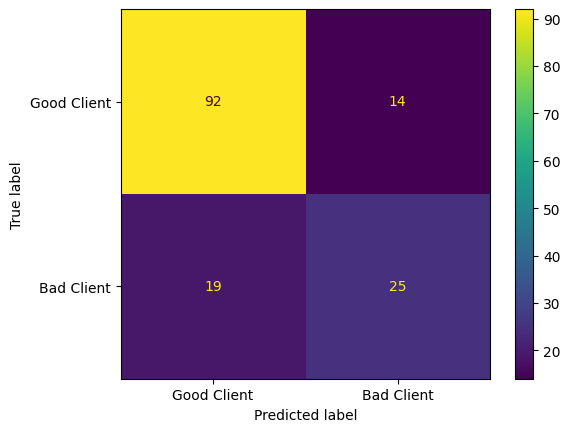

In [16]:
# b.	Obtener la matriz de confusión.

# ************* Inlcuye aquí tu código:**************************

cm = confusion_matrix(ytest, ytest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good Client', 'Bad Client'])
disp.plot()
plt.show()
# *********** Aquí termina la sección de agregar código *************

In [17]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

feature_selector = SelectFromModel(estimator=XGBClassifier(max_depth=3))

feature_selector.fit(Xtest, ytest)

factor_select = feature_selector.get_support()

Xfeatures = pd.DataFrame(Xtest).columns[factor_select]

Xfeatures
# *********** Aquí termina la sección de agregar código *************

Index(['status', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'people_liable'],
      dtype='object')

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Para esta entrega se tuvo la oportunidad de analizar solo un dataset de riesgo de crediticio y comparar los resultados con el articulo 'An Investigation of Credit Card Default Prediction in the Imbalanced Datasets'. En el articulo la tecnica Gradient Boosted Decision Tree (GBDT) tuvo un accuracy alrededor del 82% y un recall del 83% utilizando una tecnica de oversampling como SMOTE como comparacion en esta tarea se decidio usar la tecnica XGBoostClassifier con un accuracy del 78% y un recall para la clase negativa del 87% y de la clase positiva 57%.

### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ###**Fin de la Actividad de las Semanas 5 y 6.**